In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Transformation

A linear transformation is a mapping between vector spaces that preserves addition and scalar multiplication. More precisely, let $V$ and $W$ be vector spaces over a common field $F$. A map $L$ : $V → W$ is a linear transformation from $V$ into $W$ if:


$$L(ax_1 + bx_2) = aL(x_1) + bL(x_2)$$

for all vectors $x_1$, $x_2$ $∈$ $V$ and scalars $a$, $b$ $∈$ $F$.

#### Problem 1: 

Write a function for each of the linear transformations listed above. Each function should accept an array to transform and the scalars that define the transformation (a and b for stretch, shear, and reflection, and θ for rotation). Construct the matrix representation and left multiply it with the input array. Return the transformed array.
To test your functions, consider writing a separate function that plots two arrays (the original and the transformed) for a side-by-side comparison.

In [2]:
img = np.load("../Data/Volume1/horse.npy")
img.shape

(2, 59520)

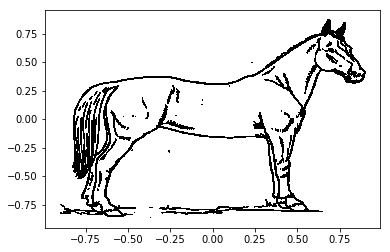

In [4]:
plt.plot(img[0], img[1], 'k,')
plt.show()

In [5]:
#stretch
def stretch(image, a, b):
    mat_rep = np.diag((a,b))
    return np.dot(mat_rep, image)

In [6]:
stretch_img = stretch(img, 1/2, 6/5)

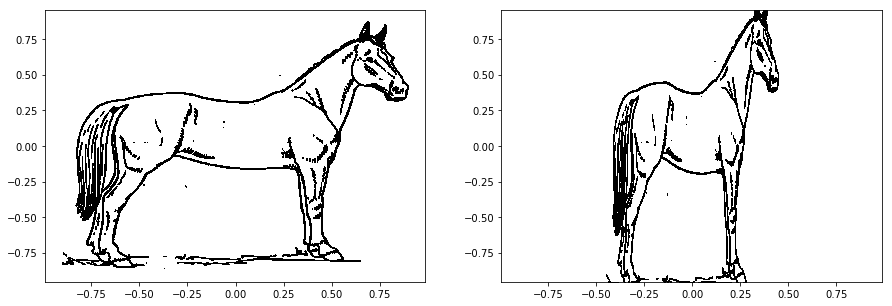

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

ax[0].plot(img[0], img[1], 'k,')
a,b = ax[0].get_xlim()
c,d = ax[0].get_ylim()

ax[1].plot(stretch_img[0], stretch_img[1], 'k,')
ax[1].set_xlim(a,b)
ax[1].set_ylim(c,d)
plt.show()

In [8]:
#shear
def shear(image, a=0, b=0):
    mat_rep = np.eye(2)
    mat_rep[0,1] = a
    mat_rep[1,0] = b
    
    return np.dot(mat_rep, image)

In [9]:
shear_img = shear(img, a=1/2)

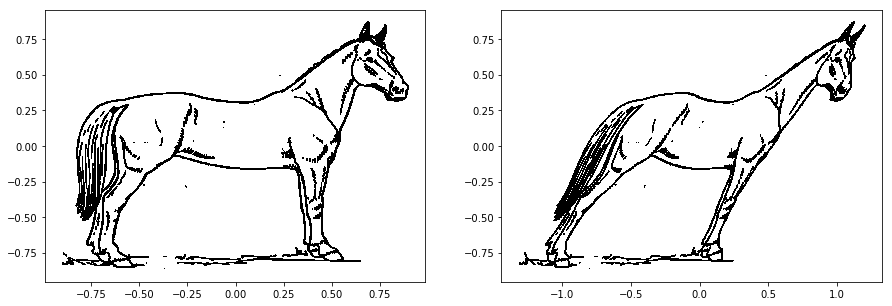

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
ax[0].plot(img[0], img[1], 'k,')

ax[1].plot(shear_img[0], shear_img[1], 'k,')
plt.show()

In [13]:
#reflection
def reflect(image, a=0, b=0):
    mat_rep = (1./(a**2 + b**2))*np.array([[a**2 - b**2, 2*a*b],
                                        [2*a*b, b**2 - a**2]])
    return np.dot(mat_rep, image)

In [54]:
reflect_img = reflect(img, a=1, b=0)

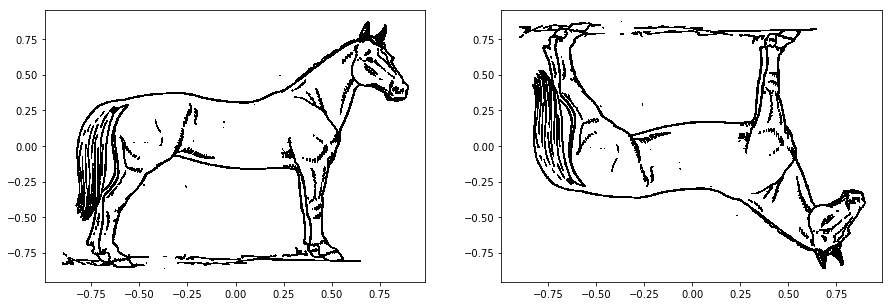

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
ax[0].plot(img[0], img[1], 'k,')

ax[1].plot(reflect_img[0], reflect_img[1], 'k,')
plt.show()

In [16]:
#rotation 
def rotate(image, theta):
    mat_rep = np.array([[np.cos(theta), -np.sin(theta)],
                        [np.sin(theta), np.cos(theta)]])
    return np.dot(mat_rep, image)

In [17]:
rotate_img = rotate(img, theta=np.pi/2)

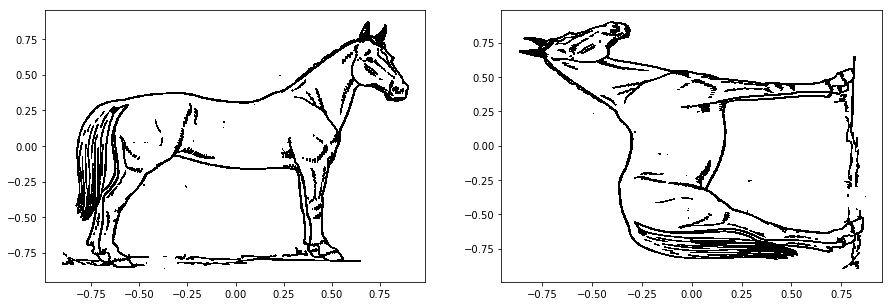

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
ax[0].plot(img[0], img[1], 'k,')
ax[1].plot(rotate_img[0], rotate_img[1], 'k,')
plt.show()

## Compositions of Linear Transformations

Let $V$ , $W$ , and $Z$ be finite-dimensional vector spaces. If $L : V → W$ and $K : W → Z$ are linear transformations with matrix representations A and B, respectively, then the composition $KL : V → Z$ is also a linear transformation, and its matrix representation is the matrix product $BA$

In [19]:
#composition
#reflect the image with a=1 and b=-1 and shear with b = 1/2
reflect_shear_img = shear(reflect(img, a=1, b=-1), b=1/2)

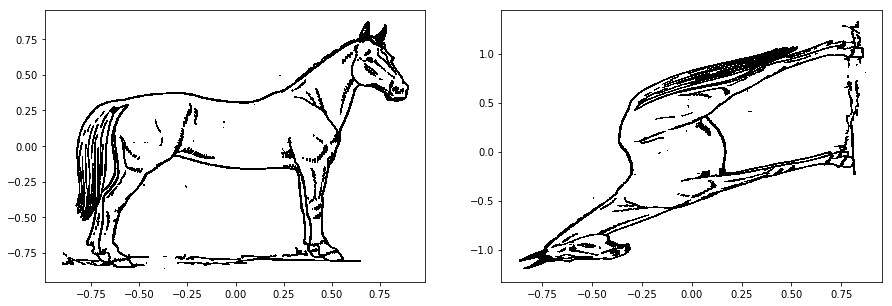

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
ax[0].plot(img[0], img[1], 'k,')
ax[1].plot(reflect_shear_img[0], reflect_shear_img[1], 'k,')
plt.show()

## Affine Transformations

An affine transformation is a mapping between vector spaces that preserves the relationships between points and lines, but that may not preserve the origin. Every affine transformation $T$ can be represented by a matrix $A$ and a vector $b$. To apply $T$ to a vector $x$, we calculate $Ax+b$. If $b=0$ then the transformation is linear, and if $A=I$ but $b=0$ then it is called a $translation$.

In [21]:
#translation
A = np.eye(2)
b = np.array([[3./4, 1./2]]).T

translate_img = np.dot(A, img) + b

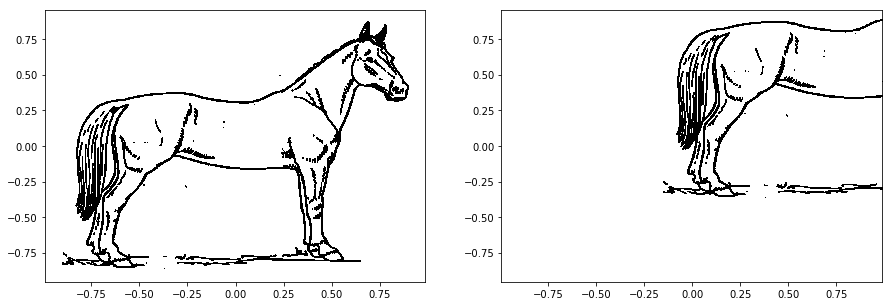

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
ax[0].plot(img[0], img[1], 'k,')
a,b = ax[0].get_xlim()
c,d = ax[0].get_ylim()

ax[1].plot(translate_img[0], translate_img[1], 'k,')
ax[1].set_xlim(a,b)
ax[1].set_ylim(c,d)
plt.show()

## Earth and Moon's Position

#### Problem 2. 

The moon orbits the earth while the earth orbits the sun. Assuming circular orbits, we can compute the trajectories of both the earth and the moon using only linear and affine transformations.

Assume an orientation where both the earth and moon travel counter- clockwise, with the sun at the origin. Let $p_e(t)$ and $p_m(t)$ be the positions of the earth and the moon at time $t$, respectively, and let $ω_e$ and $ω_m$ be each celestial body’s angular momentum. For a particular time $t$, we calculate $p_e(t)$ and $p_m(t)$ with the following steps:

1. Compute $p_e(t)$ by rotating the initial vector $p_e(0)$ counterclockwise about the origin by $tω_e$ radians.
2. Calculate the position of the moon relative to the earth at time $t$ by rotating the vector $p_m(0)−p_e(0)$ counterclockwise about the origin by tωm radians.
3. To compute $p_m(t)$, translate the vector resulting from the previous step by $p_e(t)$.

Write a function that accepts a final time $T$ and the angular momenta $ω_e$ and $ω_m$. Assuming initial positions $p_e(0) = (10, 0)$ and $p_m(0) = (11, 0)$, plot $p_e(t)$ and $p_m(t)$ over the time interval $t ∈ [0,T]$.
The moon travels around the earth approximately 13 times every year. With $T = 3π/2$ , $ω_e = 1$, and $ω_m = 13$, 
(use `plt.gca().set_aspect("equal")` to fix the aspect ratio).

In [24]:
def position(T, we, wm, pe_0 = np.array([[10, 0]]).T, pm_0 = np.array([[11, 0]]).T):
    pe_t = []
    pm_t = []
    for t in np.linspace(0,T,num = 100):
        pe_t.append(rotate(pe_0 ,t*we)[:,0])
        pm_t.append(rotate(pm_0-pe_0, t*wm)[:,0] + rotate(pe_0 ,t*we)[:,0])
    
    return np.array(pe_t), np.array(pm_t) 

In [25]:
T = 3*np.pi/2
we = 1
wm = 13
earth_pos, moon_pos = position(T, we, wm)

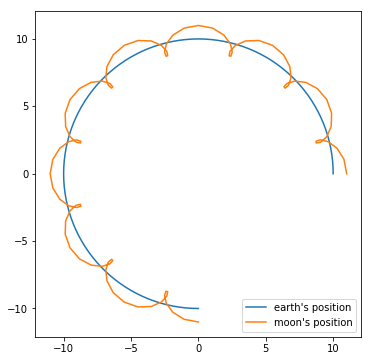

In [26]:
plt.figure(figsize=(6,6))
plt.plot(earth_pos[:,0], earth_pos[:,1], label = "earth's position")
plt.plot(moon_pos[:,0], moon_pos[:,1], label = "moon's position")
plt.legend(loc=0)
plt.gca().set_aspect("equal")
plt.show()

## Timing an algorithm

In [27]:
from random import random
import time

def random_vector(n):       # Equivalent to np.random.random(n).tolist()
    """Generate a random vector of length n as a list."""
    return [random() for i in range(n)]
def random_matrix(n):       # Equivalent to np.random.random((n,n)).tolist()
    """Generate a random nxn matrix as a list of lists."""
    return [[random() for j in range(n)] for i in range(n)]

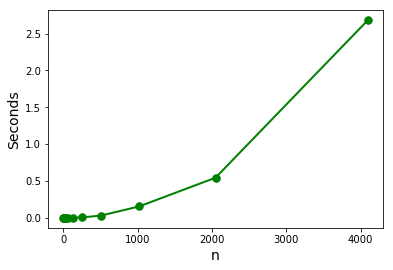

In [28]:
domain = 2**np.arange(1,13)
times = []
for n in domain:
    start = time.time()
    random_matrix(n)
    times.append(time.time() - start)

plt.plot(domain, times, 'g.-', linewidth=2, markersize=15) 
plt.xlabel("n", fontsize=14)
plt.ylabel("Seconds", fontsize=14)
plt.show()

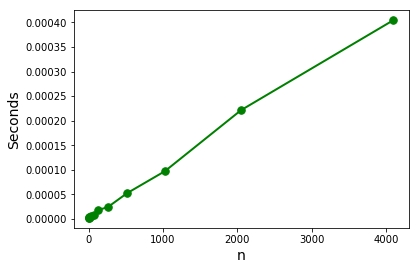

In [53]:
domain = 2**np.arange(1,13)
times = []
for n in domain:
    start = time.time()
    random_vector(n)
    times.append(time.time() - start)

plt.plot(domain, times, 'g.-', linewidth=2, markersize=15) 
plt.xlabel("n", fontsize=14)
plt.ylabel("Seconds", fontsize=14)
plt.show()

#### Problem 3. 

Let $A$ be an $m×n$ matrix with entries $a_{ij}$, $x$ be an $n×1$ vector with entries $x_k$ , and $B$ be an $n × p$ matrix with entries $b_{ij}$.

The matrix-vector product $Ax = y$ is a new $m×1$ vector and the matrix-matrix product $AB=C$ is a new $m×p$ matrix. The entries $y_i$ of $y$ and $c_ij$ of $C$ are determined by the following formulas:

$$y_i = \sum_{k=1}^{n} a_{ik}x_k$$

$$c_{ij} = \sum_{k=1}^{n} a_{ik}b_{kj} $$

Use `time.time()`, `timeit.timeit()`, or `%timeit` to time each of these functions with increasingly large inputs. Generate the inputs $A$, $x$, and $B$ with `random_matrix()` and `random_vector()` (so each input will be $n × n$ or $n × 1$). Only time the multiplication functions, not the generating functions.

In [29]:
def matrix_vector_product(A, x):    # Equivalent to np.dot(A,x).tolist()
    """Compute the matrix-vector product Ax as a list."""
    m, n = len(A), len(x)
    return [sum([A[i][k] * x[k] for k in range(n)]) for i in range(m)]
def matrix_matrix_product(A, B):    # Equivalent to np.dot(A,B).tolist()
    """Compute the matrix-matrix product AB as a list of lists."""
    m, n, p = len(A), len(B), len(B[0])
    return [[sum([A[i][k] * B[k][j] for k in range(n)])
                                    for j in range(p) ]
                                    for i in range(m) ]

In [30]:
ns = 2**np.arange(0,9)
matmat_product = []
matvec_product = []
for n in ns:
    A = random_matrix(n)
    B = random_matrix(n)
    x = random_vector(n)
    
    #matrix matrix multiplication
    start = time.time()
    matrix_matrix_product(A,B)
    end = time.time()
    matmat_product.append(end-start)
    
    #matrix vector multiplication
    start = time.time()
    matrix_vector_product(A,x)
    end = time.time()
    matvec_product.append(end-start)

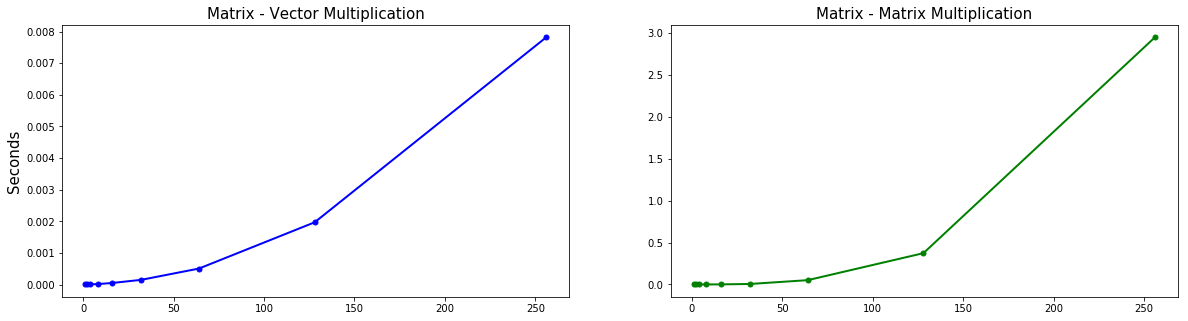

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 5))
ax[0].plot(ns, matvec_product, "b.-", lw = 2, ms = 10)
ax[0].set_title("Matrix - Vector Multiplication", size =15)
ax[1].plot(ns, matmat_product, "g.-", lw = 2, ms = 10)
ax[1].set_title("Matrix - Matrix Multiplication", size = 15)
ax[0].set_ylabel("Seconds", size = 15)
plt.show()

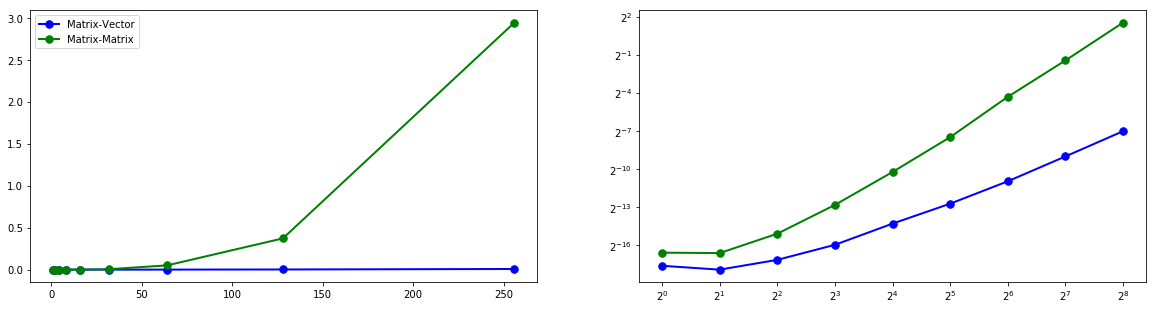

In [34]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize =(20,5)) 
# Plot both curves on a lin-lin plot.
ax[0].plot(ns, matvec_product, 'b.-', lw=2, ms=15, label="Matrix-Vector") 
ax[0].plot(ns, matmat_product, 'g.-', lw=2, ms=15, label="Matrix-Matrix") 
ax[0].legend(loc="upper left")

#loglog plot
ax[1].loglog(ns, matvec_product, 'b.-', basex=2, basey=2, lw=2, ms=15) 
ax[1].loglog(ns, matmat_product, 'g.-', basex=2, basey=2, lw=2, ms=15) 
plt.show()

#### Problem 4. 
NumPy is built specifically for fast numerical computations. Repeat the experiment of Problem 3, timing the following operations:

1. matrix-vector multiplication with matrix_vector_product(). 
2. matrix-matrix multiplication with matrix_matrix_product(). 
3. matrix-vector multiplication with np.dot().
4. matrix-matrix multiplication with np.dot().

Create a single figure with two subplots: one with all four sets of execution times on a regular linear scale, and one with all four sets of execution times on a log-log scale. Compare your results to Figure 1.5.

In [35]:
ns = 2**np.arange(0,9)
matmat_product = []
matvec_product = []
matmat_product_dot = []
matvec_product_dot = []
for n in ns:
    A = random_matrix(n)
    B = random_matrix(n)
    x = random_vector(n)
    
    #matrix matrix multiplication
    start = time.time()
    matrix_matrix_product(A,B)
    end = time.time()
    matmat_product.append(end-start)
    
    #matrix vector multiplication
    start = time.time()
    matrix_vector_product(A,x)
    end = time.time()
    matvec_product.append(end-start)
    
    #matrix matrix multiplication using dot
    start = time.time()
    np.dot(A,B)
    end = time.time()
    matmat_product_dot.append(end-start)
    
    #matrix vector multiplication using dot
    start = time.time()
    np.dot(A,x)
    end = time.time()
    matvec_product_dot.append(end-start)

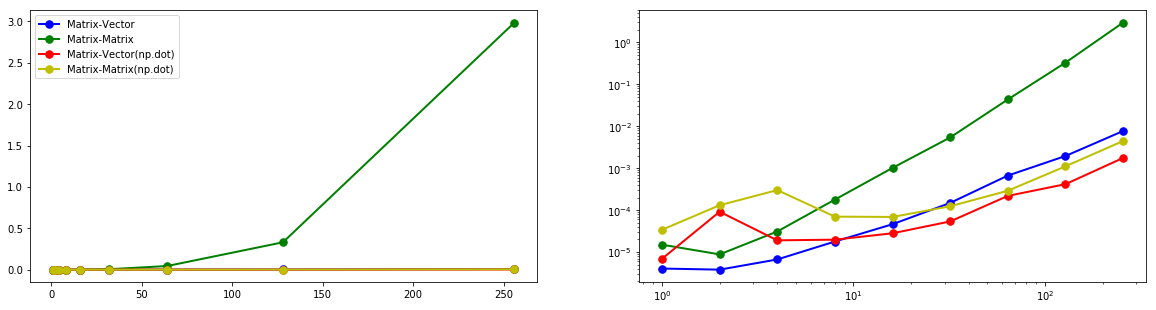

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize =(20,5))
#linlin plot
ax[0].plot(ns, matvec_product, 'b.-', lw=2, ms=15, label="Matrix-Vector") 
ax[0].plot(ns, matmat_product, 'g.-', lw=2, ms=15, label="Matrix-Matrix") 
ax[0].plot(ns, matvec_product_dot, 'r.-', lw=2, ms=15, label="Matrix-Vector(np.dot)")
ax[0].plot(ns, matmat_product_dot, 'y.-', lw=2, ms=15, label="Matrix-Matrix(np.dot)")
ax[0].legend(loc="upper left")

#loglog plots
ax[1].loglog(ns, matvec_product, 'b.-', lw=2, ms=15, label="Matrix-Vector") 
ax[1].loglog(ns, matmat_product, 'g.-', lw=2, ms=15, label="Matrix-Matrix") 
ax[1].loglog(ns, matvec_product_dot, 'r.-', lw=2, ms=15, label="Matrix-Vector(np.dot)")
ax[1].loglog(ns, matmat_product_dot, 'y.-', lw=2, ms=15, label="Matrix-Matrix(np.dot)")
plt.show()

-----

In [37]:
from matplotlib.animation import FuncAnimation
def solar_system_animation(earth, moon):
    """Animate the moon orbiting the earth and the earth orbiting the sun.
       Inputs:
           earth ((2,N) ndarray): The earth's postion with x-coordinates on the first row 
                                   and y coordinates on the second row.
           moon ((2,N) ndarray): The moon's postion with x-coordinates on the first row 
                                   and y coordinates on the second row.
    """
    fig = plt.figure()
    plt.axis([-15,15,-15,15])
    plt.gca().set_aspect("equal")
    earth_dot, = plt.plot([],[], 'bo', ms=10) 
    earth_path, = plt.plot([],[], 'b-') 
    moon_dot, = plt.plot([],[], 'go', ms=5)
    moon_path, = plt.plot([],[], 'g-') 
    plt.plot([0],[0],'y*', ms=30)
    def animate(index):
         """Update the four earth and moon plots."""
         earth_dot.set_data(earth[0,index], earth[1,index])
         earth_path.set_data(earth[0,:index], earth[1,:index])
         moon_dot.set_data(moon[0,index], moon[1,index])
         moon_path.set_data(moon[0,:index], moon[1,:index])
         return earth_dot, earth_path, moon_dot, moon_path,
    a = FuncAnimation(fig, animate, frames=earth.shape[1], interval=25)
    plt.show()

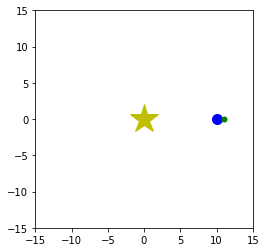

In [38]:
solar_system_animation(earth_pos.T, moon_pos.T)